<a href="https://colab.research.google.com/github/hooooooni/google_review_LDA_english/blob/main/LDA_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Web Crawling

We are going to import the review data from the Google Play Store.

In [ ]:
!pip install -qq google-play-scraper

Google-play-scraper is a Python package that provides tools for scraping and collecting app information from the Google Play Store.

In [ ]:
!pip install -qq -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00


In [ ]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

pandas             : 1.5.3
matplotlib         : 3.7.1
seaborn            : 0.12.2
google_play_scraper: 1.2.4



In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

- json: Python standard library for processing JSON data.
- pandas: a library for handling data frames.
- tqdm: a library that displays progress visually.
- Seaborn: A statistical graphic library based on Matplotlib that helps you create a better visualization.
- matplotlib.pyplot: Library for data visualization.
- pygments: Library for code grammar emphasis.

<br><br>

- 'google_play_scraper': Library for importing app information and reviews from the Google Play store
- '%matplotlibline': Enable graphic output in the Jupiter Notebook.
- '%config InlineBackend.config_format='retina'': Set graphic output setting to 'retina' to enable high resolution graphic output.
- 'ns.set()': Initialize and set the style, palette, font size, etc. of the Seaborn library.

In [ ]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

* Each item is the name of the package used to identify a specific app in the Google Play Store.

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.67it/s]


-> Add app information to the list, excluding review information. <br>
The lang parameter represents a language, where it is set to English. The country parameter represents a country, where it is set to the United States.

In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

Define a function named print_json. This function takes the JSON object as a factor and outputs it readably.

Use the json.dumps function to convert a JSON object into a string. <br>

- json_object—Indicates the JSON object to be converted.
- indent=2: Set indent to 2 spaces to make the output format look good.
- sort_keys=True: Sorts and outputs the keys in alphabetical order.
- default=str: Used by default to prevent TypeError during JSON encoding, and uses the str function to convert objects into strings.

- Use the pyguments library to highlight and output the JSON string.


> JsonLexer(): Creates a lexer for the JSON format.

> TerminalFormatter(): Create a format for output to the terminal.

Highlights the JSON string as a > highlight() function and outputs it as a print() function.


In [ ]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 40M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, a planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do lis

Review the imported review information.

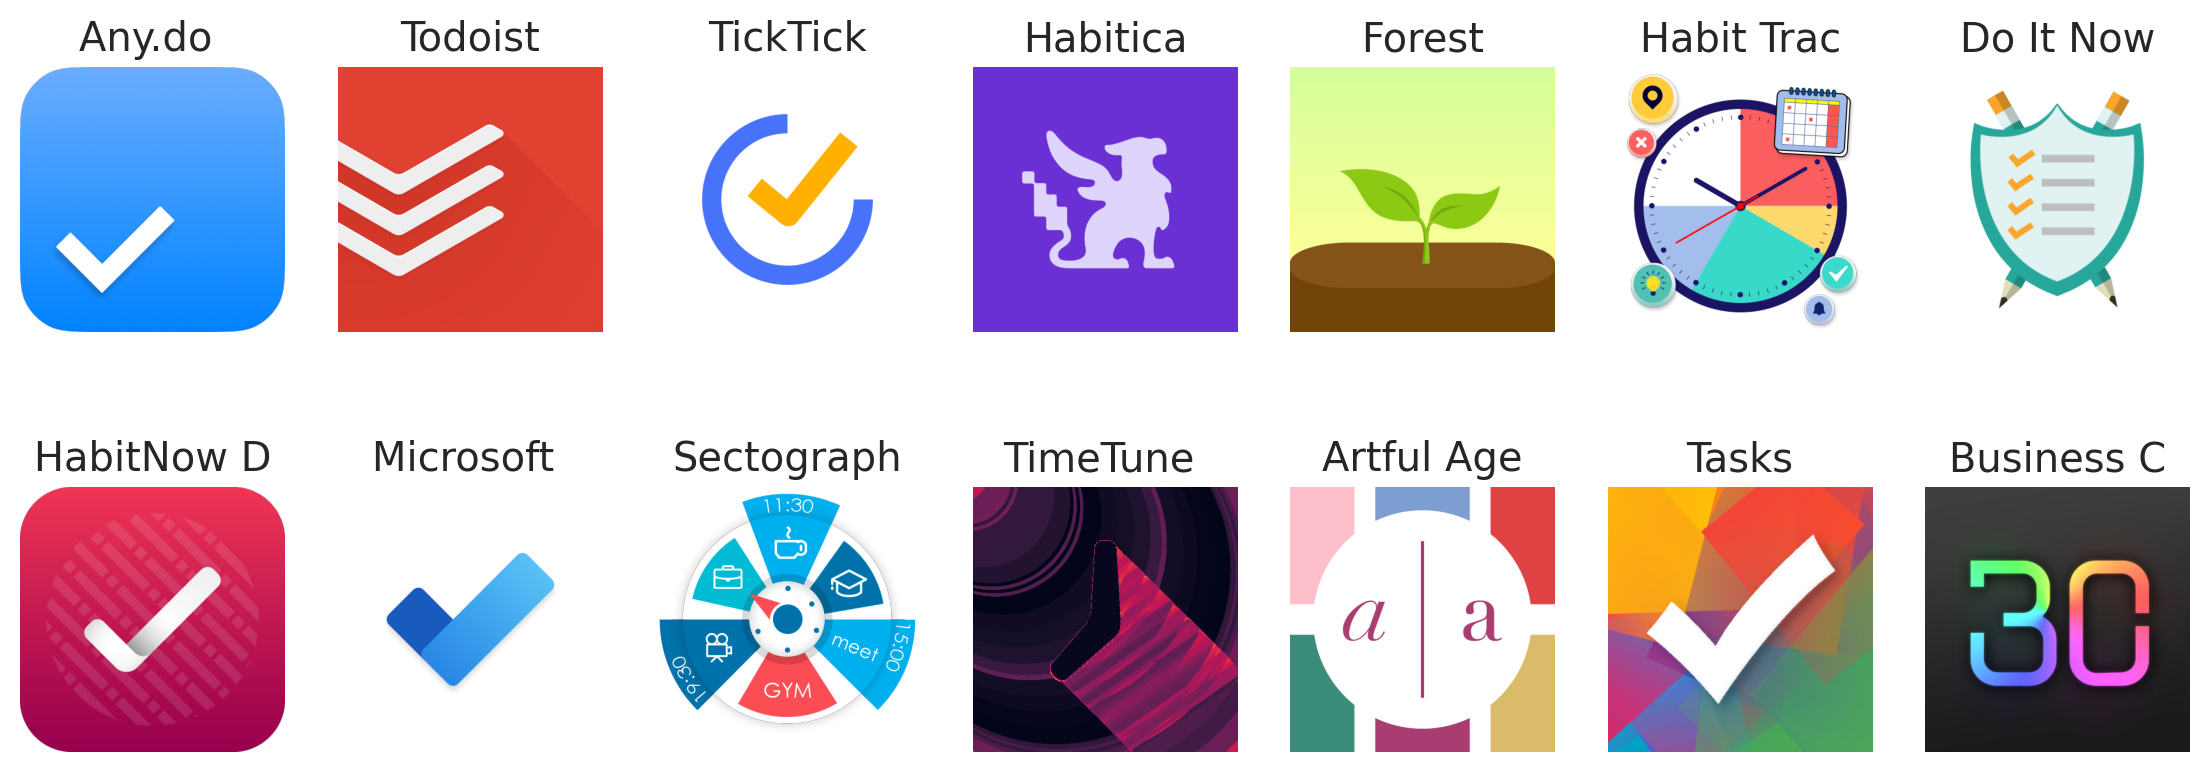

In [ ]:
import urllib
import numpy as np
from PIL import Image  # Image 클래스를 가져옵니다.
import matplotlib.pyplot as plt

def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = Image.open(urllib.request.urlopen(ai['icon']))
    ax.imshow(np.array(img))
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

This code allows you to check which apps you have imported reviews from.

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

The part where the app information stored in the app_infos list is converted to DataFrame and saved as a CSV file

In [ ]:
app_reviews = []

for ap in tqdm(app_packages): #app_packages에 있는 각 앱 패키지에 대해 반복하고,
# 각 앱에 대해 1부터 5까지의 점수와 정렬 방법(MOST_RELEVANT, NEWEST)에 대해 반복합니다.
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:59<00:00,  3.96s/it]


Use the reviews function in the google_play_scraper library to get reviews for each app. ap represents the current app package, score represents the current score, and sort_order represents how to sort. Get up to 200 reviews (when a score is 3 points) or 100 (other scores).

In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "appVersion": "5.17.0.119",
  "at": "2023-07-02 17:35:08",
  "content": "I used to love this app, but recently they did a big push for premium. At the same time, I started having a huge issue with my lists not opening. The screen shows, but it is grayed out and I can't click on anything. I tried the premium to see if that would help, but it hasn't. My lists are inaccessible to me. I have tried uninstalling and reinstalling the app to noavail.",
  "repliedAt": "2023-07-03 09:28:29",
  "replyContent": "You should only see the upgrade ad when you first log into your accout or when you are trying to use premium features. You can always dismiss it, though! As for the lists issue - please contact us at https://www.any.do/contact_form or via Settings \u2192 Support and we will get that sorted for you! \ud83d\ude0a",
  "reviewCreatedVersion": "5.17.0.119",
  "reviewId": "eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUp

In [ ]:
len(app_reviews)

17604

Code to check the length of how many reviews there are.

In [ ]:
from google.colab import files

app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

files.download('reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Convert the app review information stored in the app_reviews list to DataFrame and use the to_csv function to save it as a file called 'reviews.csv'.

- 'reviews.csv': Specifies the name of the CSV file to save.

- index=None: Disable saving the index of DataFrame to a CSV file.

- Header=True: Include the header (column name) in the CSV file.

Download the file 'reviews.csv' locally using the files.download function. If you run it in a Google Korab environment, the file will be downloaded locally.

# 2. Build a virtual environment and import data and packages

## 1) Establishing a virtual environment

The version of the package provided by Google Korab is not suitable for importing the project, so you need to build a Conda virtual environment provided by Korab.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [ ]:
import condacolab

In [ ]:
! pip install numpy
! pip install pandas
! pip install konlpy
! pip install tqdm
! pip install re
! pip install gensim
! pip install pyLDAvis

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from tqdm import tqdm
import re
from gensim import corpora
import gensim
import pyLDAvis.gensim_models
from collections import Counter

The process of installing the packages for future use.

## 데이터 불러오기

In [ ]:
dataset_raw = pd.read_csv('reviews.csv') #본인 경로, 본인이 설정해 둔 파일명으로 수정
dataset_raw.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410,Krista Clark,https://play-lh.googleusercontent.com/a/ACg8oc...,"I used to love this app, but recently they did...",1,159,5.17.0.119,2023-07-02 17:35:08,You should only see the upgrade ad when you fi...,2023-07-03 09:28:29,5.17.0.119,most_relevant,com.anydo
1,a6b21375-312e-41b5-90ab-3d56273ca01b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app was great until the latest update and...,1,40,4.12.0.5,2019-01-12 13:20:28,"We are sorry you feel this way, please note th...",2019-01-27 15:44:37,4.12.0.5,most_relevant,com.anydo
2,1177566d-6443-42ab-8320-7e8b3342cec8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Product images show the month view at the top ...,1,13,NaN,2019-07-06 21:14:32,We appreciate the feedback. The images for iOS...,2019-07-09 11:45:56,NaN,most_relevant,com.anydo
3,82d2f0c3-dbff-4722-89fa-d8af997ba4ab,Hyco Syco,https://play-lh.googleusercontent.com/a/ACg8oc...,This app used to be great when paired with Ale...,1,10,4.15.9.6,2020-06-17 17:32:55,"Sorry about that, our team is currently workin...",2020-06-18 06:47:52,4.15.9.6,most_relevant,com.anydo
4,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very annoyed that I have to keep signing in an...,1,27,4.15.8.11,2019-09-29 16:03:25,"Hi, that's odd, please send us a bug report in...",2019-10-02 19:51:43,4.15.8.11,most_relevant,com.anydo


* pd.read_excel ('Excel file directory') : Import Excel file function

* head(): Top 5 rows output

You should do something that leaves only the columns you want to use when you analyze.
Remove the columns except for the content of the review, the score of the rating, and appId of which app.

In [ ]:
columns_to_drop = ['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at','replyContent', 'repliedAt', 'appVersion', 'sortOrder']

dataset_raw = dataset_raw.drop(columns_to_drop, axis=1)

dataset_raw.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,score,appId
0,"I used to love this app, but recently they did...",1,com.anydo
1,This app was great until the latest update and...,1,com.anydo
2,Product images show the month view at the top ...,1,com.anydo
3,This app used to be great when paired with Ale...,1,com.anydo
4,Very annoyed that I have to keep signing in an...,1,com.anydo


Check whether missing values exist, data type, and number of data.

In [ ]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17604 entries, 0 to 17603
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  17603 non-null  object
 1   score    17604 non-null  int64 
 2   appId    17604 non-null  object
dtypes: int64(1), object(2)
memory usage: 412.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


content    1
score      0
appId      0
dtype: int64

Remove missing values.

In [ ]:
# axis = 0: 결측치 포함한 모든 행 제거
dataset = dataset_raw.dropna(axis = 0)
dataset.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


content    0
score      0
appId      0
dtype: int64

In [ ]:
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,score,appId
0,"I used to love this app, but recently they did...",1,com.anydo
1,This app was great until the latest update and...,1,com.anydo
2,Product images show the month view at the top ...,1,com.anydo
3,This app used to be great when paired with Ale...,1,com.anydo
4,Very annoyed that I have to keep signing in an...,1,com.anydo
...,...,...,...
17599,"I'm just beginning to schedule my life, but pl...",5,com.appxy.planner
17600,It works like a Franklin planner that I have m...,5,com.appxy.planner
17601,"Loving the app, quite convenient and easy to u...",5,com.appxy.planner
17602,It's easy to use but it always does not tell y...,5,com.appxy.planner


* dropna(): method to remove missing values

* The ⇒ of axis=0 means that if the value of axis is 0, the operation should be performed in the row direction. Therefore, the row is checked for missing values and the row with missing values is removed.

**Summary**

Because we saw missing values above, we removed all rows, including missing values, and made sure that they were removed correctly.

## treatment of stopwords

Install and import packages that handle ## treatment of stopwords

In [ ]:
!pip install nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 67.3 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Gets the list of stopword provided by NLTK.
stop_words = set(stopwords.words('english'))

# Remove the terminology and create a list to store the processed data.
processed_reviews = []

# It's the process of identifying what kind of word the word provides.
print(stop_words)

{'shan', 'after', 'himself', 'i', 'it', 'don', 'ours', "it's", 'your', 'be', "you'll", 'these', 'while', 'some', 'am', 'its', "she's", 'have', 'him', "you're", 's', 'was', 'what', 'here', 'off', 'is', 'own', 'for', 'herself', 'where', 'haven', 'on', 'an', "you've", 'having', "wasn't", 'any', 'hasn', 'or', "hasn't", 'nor', 'yours', 'only', 'below', 'as', 're', 'she', 'needn', 'that', 'he', 'by', 'do', 'yourselves', 'had', 'into', 'weren', 'which', 'of', 'then', 'are', 'her', 'about', 'aren', 'his', 'mightn', 'isn', 'ma', 'been', 'were', 'should', 'both', 'm', 'those', 'before', 'hers', 'itself', 'to', 'a', 'up', 'not', "didn't", 'again', 've', "don't", "weren't", 'we', 'once', 'further', 'through', "couldn't", 'me', 'now', 'didn', "mustn't", "aren't", 'against', 'other', 'did', 'whom', 'they', 'won', 'between', 'during', 'does', 'my', 'being', "you'd", 'than', 'you', 'so', "isn't", "hadn't", 'and', 'too', 'themselves', 'such', "that'll", 'if', 'can', "shouldn't", 'll', "mightn't", 'few'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove the stopword terminology from the 'content' column in dataset_raw and save it to the list.
for review in dataset['content']:
    if isinstance(review, str):  # Process only if string
        words = review.split()  # Split each review into words
        # Save only stopwords
        processed_review = ' '.join([word for word in words if word.lower() not in stop_words])
        processed_reviews.append(processed_review)
    else:
        processed_reviews.append('')  # Treat NaN or empty value as empty string

# Adds the de-terminated data as a new column.
dataset['review_prep'] = processed_reviews

# Treat NaN values as empty strings
dataset['review_prep'] = dataset['review_prep'].apply(lambda x: '' if pd.isna(x) else x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,score,appId,review_prep
0,"I used to love this app, but recently they did...",1,com.anydo,"used love app, recently big push premium. time..."
1,This app was great until the latest update and...,1,com.anydo,app great latest update grocery list changed. ...
2,Product images show the month view at the top ...,1,com.anydo,Product images show month view top screen dots...
3,This app used to be great when paired with Ale...,1,com.anydo,app used great paired Alexa. Every awhile sync...
4,Very annoyed that I have to keep signing in an...,1,com.anydo,annoyed keep signing deleted lists. Ive workin...
...,...,...,...,...
17599,"I'm just beginning to schedule my life, but pl...",5,com.appxy.planner,"I'm beginning schedule life, planner pro instr..."
17600,It works like a Franklin planner that I have m...,5,com.appxy.planner,works like Franklin planner missed using.
17601,"Loving the app, quite convenient and easy to u...",5,com.appxy.planner,"Loving app, quite convenient easy use. able sc..."
17602,It's easy to use but it always does not tell y...,5,com.appxy.planner,easy use always tell appointments r do.


You can see that words from the list of stopwords have been removed.

## Lowercase Transformation & Phrase Extraction (Processing operation to treat a word whether the word form is past or future)

Because lower case and upper case are viewed differently, it converts all lower case letters and extracts only the stems. Also, one-letter words usually have no typo or meaning, so one-letter words are deleted.

In [ ]:
from nltk.stem import PorterStemmer

# Initialize stem extractor
stemmer = PorterStemmer()

# For each data in the 'review_prep' column, convert to lowercase and extract the stems
dataset['review_prep'] = dataset['review_prep'].apply(lambda review: ' '.join([stemmer.stem(word.lower()) for word in review.split()]))

# Delete a one-letter word
dataset['review_prep'] = dataset['review_prep'].apply(lambda review: ' '.join([word for word in review.split() if len(word) > 1]))

# Check results
print(dataset['review_prep'].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    use love app, recent big push premium. time, s...
1    app great latest updat groceri list changed. n...
2    product imag show month view top screen dots, ...
3    app use great pair alexa. everi awhil sync wou...
4    annoy keep sign delet lists. ive work master s...
Name: review_prep, dtype: object


Remove letters other than alphabets and spaces.

In [ ]:
import re

# Functions: Remove the rest, leaving only alphabets and spaces
def keep_only_alphanumeric(text):
    # Remove all characters except alphabets and spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Remove the rest, leaving only alphabets and spaces for each review
dataset['review_prep'] = dataset['review_prep'].apply(keep_only_alphanumeric)

# Check results
print(dataset['review_prep'].head())

0    use love app recent big push premium time star...
1    app great latest updat groceri list changed no...
2    product imag show month view top screen dots o...
3    app use great pair alexa everi awhil sync woul...
4    annoy keep sign delet lists ive work master sh...
Name: review_prep, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Separate rating-based data

## Tokenization

### Separate rating-based data

Google Play Store has a rating of 5 points. Therefore, in this project, 4 to 5 points were classified as positive reviews and 1 to 2 points as negative reviews. This is intended to distinguish whether reviews related to service experience are positive or negative.

NLTK does not have a built-in method that extracts nouns directly. Therefore, in order to extract nouns using NLTK, you must go through the process of extracting nouns after tagging the part of speech.

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Positive Review: Rating 4, 5
review_pos = dataset[(dataset['score'] == 4) | (dataset['score'] == 5)]['review_prep']

# Split into words using NLTK's WordPunctTokenizer
tokenizer = nltk.WordPunctTokenizer()

# a function that extracts only nouns
def extract_nouns(text):
    # Tag part speech by word using NLTK
    tagged_words = nltk.pos_tag(tokenizer.tokenize(text))

    # Choose only words that are NN, NNP, NNS, and NNPS parts of speech and regard them as nouns
    nouns = [word for word, pos in tagged_words if pos.startswith('NN')]
    return nouns

# Extract nouns for each review_pos and save them in review_tokenized_pos
review_tokenized_pos = [extract_nouns(review) for review in review_pos]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Negative review: Rating 1 and 2
review_neg = dataset[(dataset['score'] == 1) | (dataset['score'] == 2)]['review_prep']

# Split into words using NLTK's WordPunctTokenizer
tokenizer = nltk.WordPunctTokenizer()

# a function that extracts only nouns
def extract_nouns(text):
    # Tag part speech by word using NLTK
    tagged_words = nltk.pos_tag(tokenizer.tokenize(text))

    # Choose only words that are NN, NNP, NNS, and NNPS parts of speech and regard them as nouns
    nouns = [word for word, pos in tagged_words if pos.startswith('NN')]
    return nouns

# Extract nouns for each review_pos and save them in review_tokenized_neg
review_tokenized_neg = [extract_nouns(review) for review in review_neg]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Summary**

We extracted only nouns from positive and negative reviews and saved them in review_tokenized_pos and review_tokenized_neg, respectively.

## 전처리 결과 확인

In [ ]:
review_num_pos = len(review_tokenized_pos)
review_num_neg = len(review_tokenized_neg)
review_num_tot = review_num_pos + review_num_neg

print(f"Total number of reviews analyzed: {review_num_tot}")
print(f"Positive reviews: {review_num_pos}({(review_num_pos/review_num_tot)*100:.2f}%)")
print(f"Negative review: {review_num_neg}({(review_num_neg/review_num_tot)*100:.2f}%)")

분석한 리뷰 총 개수: 11900
긍정적 리뷰: 6000개(50.42%)
부정적 리뷰: 5900개(49.58%)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's look at the number of reviews analyzed by the len function.

Because adding review_num_pos and review_num_neg gives you a total review, let's create a review_num_tot and use the print function to find out the total number of reviews and the number of positive and negative reviews.

As a result, 11,900 of the 17,603 review data initially collected were left after pre-processing.

**Summary**

The total number of reviews analyzed by the len and print functions was 11,900, and the number and proportion of positive reviews and the number and proportion of negative reviews were found.

# LDA topic modeling

## 1) Hyperparameter tuning

The number of topics and the number of learnings are hyperparameters. In this project, 10 topics are extracted from each of the positive and negative reviews. The number of learning changes to the PASSES option and determines how many times you want to learn the entire document data.

- Hyperparameters: Parameters that the user must set in advance to train the model

- PASSES: Number of steps to repeatedly input and learn the model into the topic model

In [ ]:
NUM_TOPICS = 10 # Topic counts are hyperparameters
# Passes: Epoch-like concept in deep learning, determining the number of model learning by total corpus
PASSES = 15

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2) Model learning function

lda_modeling is a function that performs topic modeling that we will create.

In [ ]:
def lda_modeling(review_prep):
    # Word encoding and frequency calculation
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # Learning the LDA Model
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES)
    return model, corpus, dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Code Analysis**

1. Define the function 'defla_modeling(review_prep):': 'lda_modeling' and receive the parameter 'review_prep'. This parameter is pre-processed review data for which topic modeling is to be performed.
2. Use 'dictionary=corpora.dictionary(review_prep)': 'corpora.dictionary' to create a dictionary. This dictionary maps words in pre-processed review data to unique integers.
    
    * corpora.Dictionary: a tool provided by the Gensim library that creates a dictionary that represents text documents
    
    - Example of using corpora
        
        ```python
        from gensim import corpora
        
        # short text documents
        documents = [
            ['apple', 'banana', 'cherry'],
            ['banana', 'orange', 'kiwi'],
            ['apple', 'cherry', 'orange', 'banana']
        ]
        
        # Creating Dictionary
        dictionary = corpora.Dictionary(documents)
        
        # Verify the unique ID of each word
        print(dictionarry.token2id) #Identification mapping for the word
        
        # Get ID for a particular word
        print(dictionary.token2id.get('banana'))  # banana에 대한 ID
        ```
        
        This generated dictionary can be used to digitize text data and utilize it for various natural language processing tasks.
        
3. 'corpus = [dictionary.doc2bow(review) for review in review_prep]': To calculate word frequency, use 'doc2bow' to convert each review into word frequency form (corpus). This form includes the index of the word and the frequency of the word.
    
    * doc2bow : A method provided by the Gensim library that serves to convert the document into Bag-of-Words format. Bag-of-Words is a representation of text data as the frequency of appearance of words and does not take into account the order of appearance of words.
    
    - doc2bow Usage Example
        
        ```python
        from gensim import corpora
        
        # Create Dictionary (Identify Words)
        dictionary = corpora.Dictionary([
            ['apple', 'banana', 'cherry'],
            ['banana', 'orange', 'kiwi'],
            ['apple', 'cherry', 'orange', 'banana']
        ])
        
        # Document Example
        document = ['apple', 'banana', 'banana', 'cherry']
        
        # Convert documents to Bag-of-Words
        bow_document = dictionary.doc2bow(document)
        print(bow_document)
        ```
        
        Output
        
        ```python
        [(0, 1), (1, 2), (2, 1)]
        ```
        
4. Learn the LDA Model:
    - Create an LDA model using the 'model = gensim.models.ldamodel.LdaModel(...)': 'gensim' library.
    - 'corpus': Use the previously converted word frequency form (corpus) as input data.
    - 'num_topics=NUM_TOPICS': Set the number of topics. 'NUM_TOPICS' is a predefined constant (defined by 10 hyperparameter tuning) that represents the number of topics.
    - 'id2word = dictionary': Use the word dictionary you created earlier to link words to their indexes.
    - 'passes = PASSES': Indicates the number of times data is repeatedly used to learn the LDA model. 'PASSES' is a predefined constant (defined by 15 hyperparameter tuning) that represents the number of learning iterations.
5. 'return model, corpus, dictionary': Returns the learned LDA model ('model'), word frequency form ('corpus') and word dictionary ('dictionary').

## 3) Word composition output function by topic

In [ ]:
import pandas as pd
from google.colab import files

def print_topic_prop(topics, RATING):
    topic_values = [topic[1] for topic in topics]
    topic_prop = pd.DataFrame({"topic_num": list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})

    # Save as Excel file, need modification to your own path
    file_path = f'/content/drive/MyDrive/dongguk_english/topic_prop_english_{RATING}.xlsx'
    topic_prop.to_excel(file_path)

    # Download File
    files.download(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 4) Visualization function

In [ ]:
import os
import pyLDAvis
import pyLDAvis.gensim_models

def lda_visualize(model, corpus, dictionary, RATING, result_dir):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)

    # Saving Visualization Results
    RESULT_FILE = os.path.join(result_dir, f'lda_result_{RATING}.html')
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5) Positive review topic modeling

In [ ]:
model, corpus, dictionary = lda_modeling(review_tokenized_pos)
NUM_WORDS = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lda_visualize(model, corpus, dictionary, RATING, '/content/drive/MyDrive/dongguk_english/')
# Last element needs to be modified to your own path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 6) Negative review topic modeling

In [ ]:
model, corpus, dictionary = lda_modeling(review_tokenized_neg)
NUM_WORDS = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'neg'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lda_visualize(model, corpus, dictionary, RATING,'/content/drive/MyDrive/dongguk_english/')
# Last element needs to be modified to your own path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# It's very important!!
Under the assumption that you have mounted it on your Google drive, the codes below work.
(You cannot download csv and html files unless you mount them and set the right path for your Google drive.)